In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pwd


'C:\\Users\\Dell\\datascience'

In [4]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Data Loading
rent_df=pd.read_csv('C:\\Users\\Dell\\datascience\\House_Rent_Dataset.csv')
print(rent_df.to_string())
data=rent_df

       Posted On  BHK     Rent  Size                     Floor    Area Type                                                         Area Locality       City Furnishing Status  Tenant Preferred  Bathroom Point of Contact
0     2022-05-18    2    10000  1100           Ground out of 2   Super Area                                                                Bandel    Kolkata       Unfurnished  Bachelors/Family         2    Contact Owner
1     2022-05-13    2    20000   800                1 out of 3   Super Area                                              Phool Bagan, Kankurgachi    Kolkata    Semi-Furnished  Bachelors/Family         1    Contact Owner
2     2022-05-16    2    17000  1000                1 out of 3   Super Area                                               Salt Lake City Sector 2    Kolkata    Semi-Furnished  Bachelors/Family         1    Contact Owner
3     2022-07-04    2    10000   800                1 out of 2   Super Area                                             

## Data Exploration and Cleaning

In [6]:
print(rent_df.head())

    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         1    Contact Owner

In [7]:
#Checking shape
print(rent_df.shape)

(4746, 12)


In [8]:
#took randon record
rent_df.sample()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
3330,2022-06-14,3,20000,1600,Ground out of 2,Super Area,"Chromepet, GST Road",Chennai,Semi-Furnished,Bachelors/Family,4,Contact Owner


In [9]:
#Checking the columns in the dataset
rent_df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [10]:
#Information about the dataset --> values rows columns
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [11]:
#Describe the dataset--> overall statistics(mean,min,max,etc..)
rent_df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [12]:
#Data Preprocessing
#Checking if there is any NULL value present in the Dataset
rent_df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [13]:
#checking is there any duplicates value present in the Dataset---> unique rows
rent_df.duplicated().sum()

0

In [14]:
#Checking the Mean,Median,Max,Min House rents
print("Mean House Rent:",round(rent_df["Rent"].mean()))
print("Mediann House Rent:",round(rent_df["Rent"].median()))
print("Maximum House Rent:",round(rent_df["Rent"].max()))
print("Minimum House Rent:",round(rent_df["Rent"].min()))

Mean House Rent: 34993
Mediann House Rent: 16000
Maximum House Rent: 3500000
Minimum House Rent: 1200


In [15]:
#5 Highest House Rents present in the Dataset--> Asecending by default
rent_df["Rent"].sort_values(ascending=False)[:5]

1837    3500000
1001    1200000
827     1000000
1329     850000
1459     700000
Name: Rent, dtype: int64

In [16]:
#5 Lowest House Rents present in the Dataset
rent_df["Rent"].sort_values()[:5]

4076    1200
285     1500
471     1800
2475    2000
146     2200
Name: Rent, dtype: int64

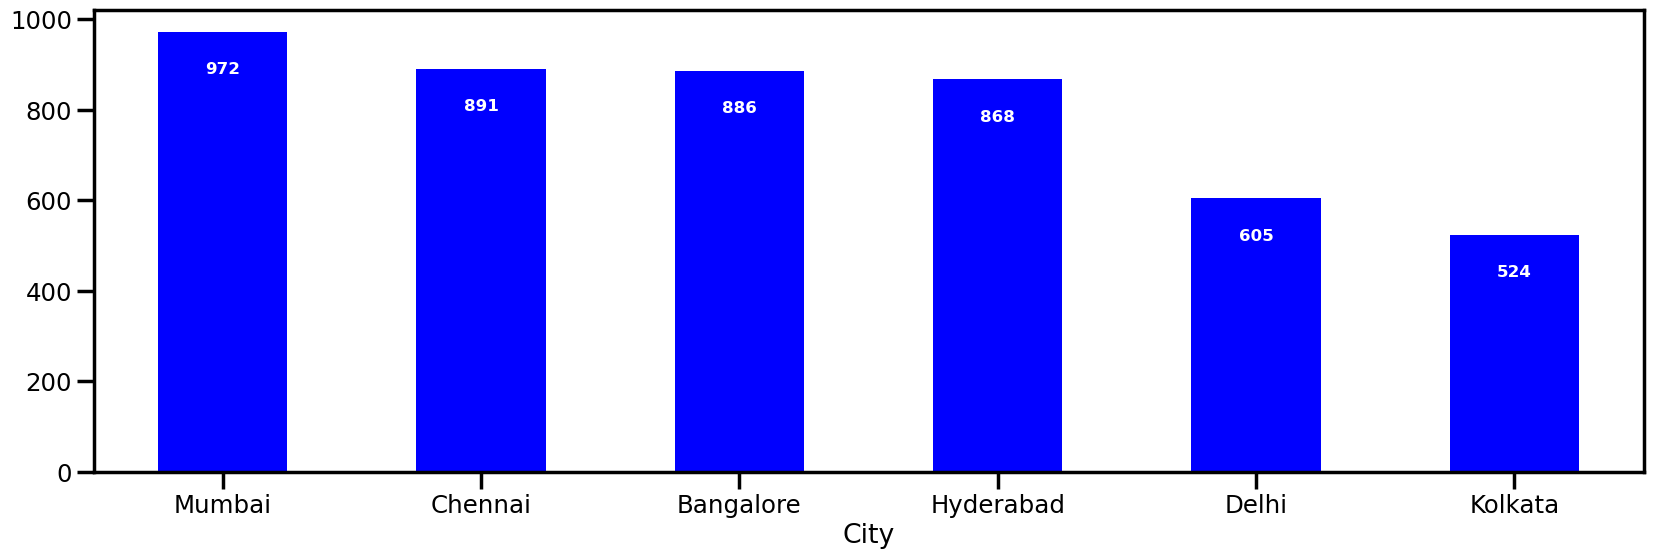

In [17]:
#EDA
#Bar plot for Number of house in each in each city which is available for rent
#annotate-->editing inside the plot 
sns.set_context("poster", font_scale=.8)
plt.figure(figsize=(20, 6))
ax = rent_df["City"].value_counts().plot(kind="bar", color="blue", rot=0)

# Annotate the bars with their values
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() - 100),
                ha='center', va='bottom', color='white', fontsize=12, weight='bold')

plt.show()
    

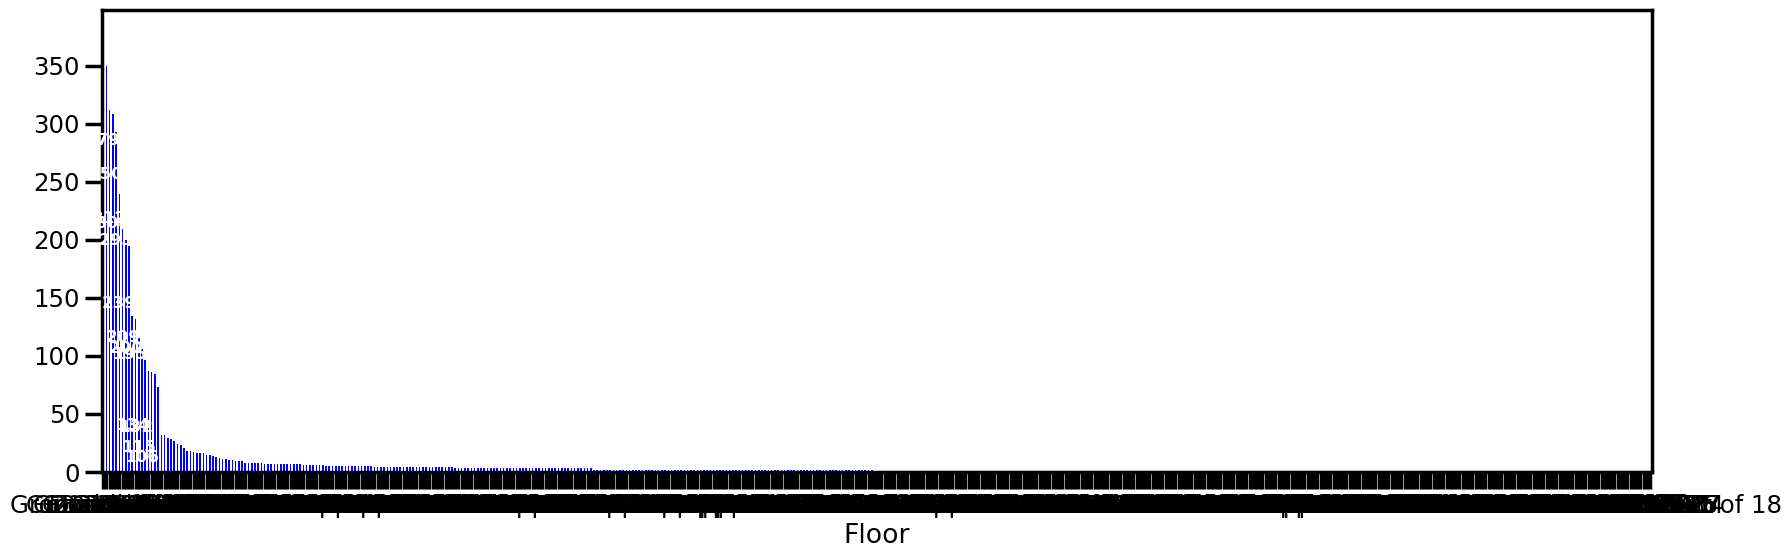

In [18]:
sns.set_context("poster", font_scale=.8)
plt.figure(figsize=(20, 6))
ax = rent_df["Floor"].value_counts().plot(kind="bar", color="blue", rot=0)

# Annotate the bars with their values
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() - 100),
                ha='center', va='bottom', color='white', fontsize=12, weight='bold')

plt.show()

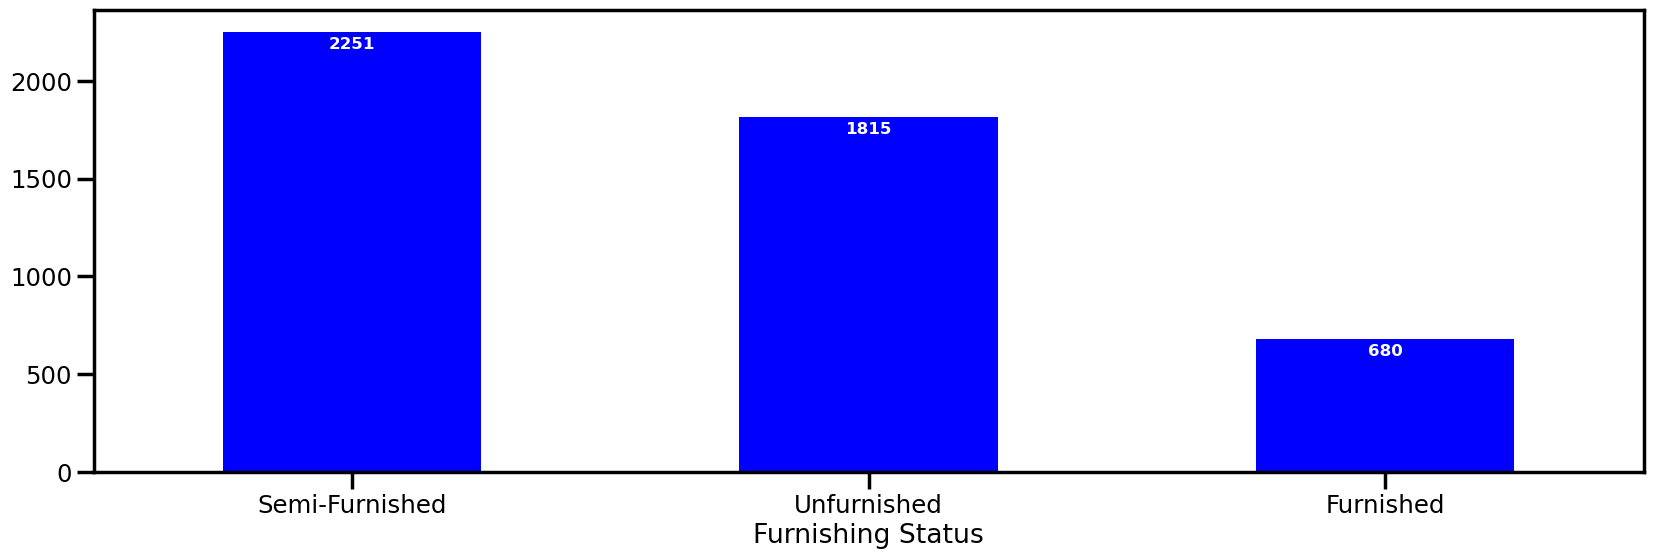

In [19]:
sns.set_context("poster", font_scale=.8)
plt.figure(figsize=(20, 6))
ax = rent_df["Furnishing Status"].value_counts().plot(kind="bar", color="blue", rot=0)

# Annotate the bars with their values
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() - 100),
                ha='center', va='bottom', color='white', fontsize=12, weight='bold')

plt.show()

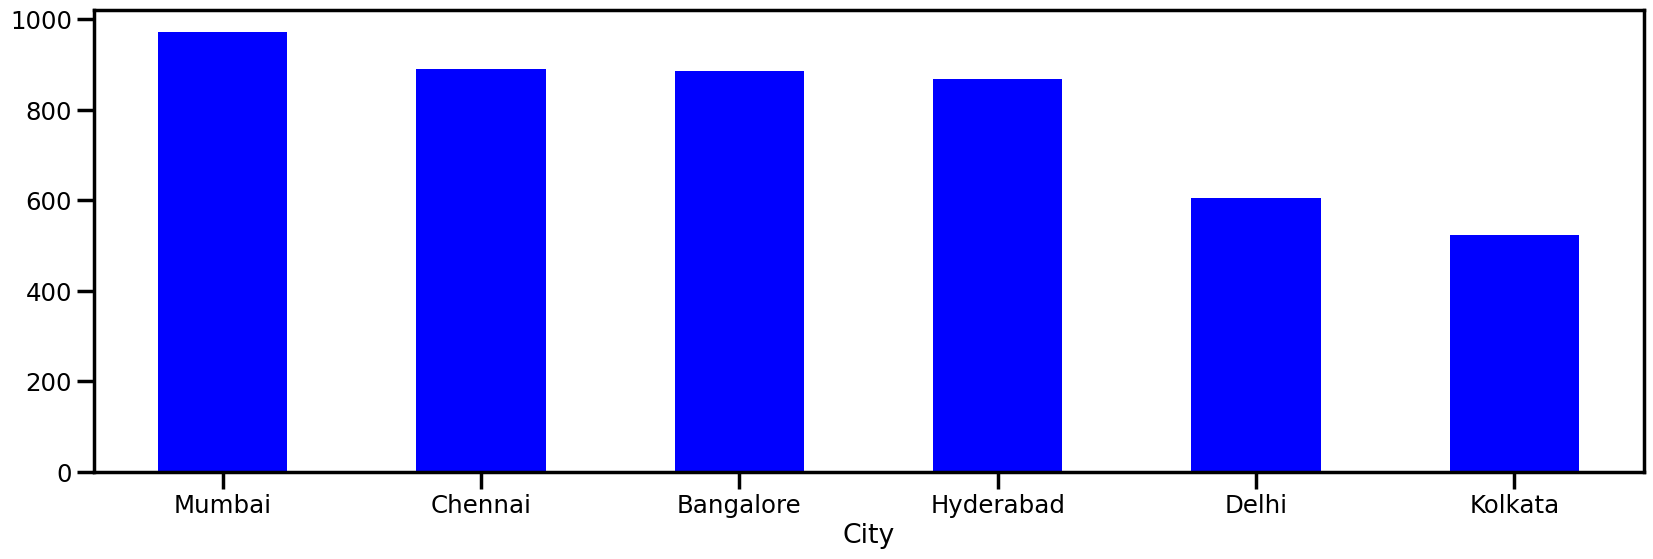

In [20]:
sns.set_context("poster", font_scale=.8)
plt.figure(figsize=(20, 6))
ax = rent_df["City"].value_counts().plot(kind="bar", color="blue", rot=0)
plt.show()

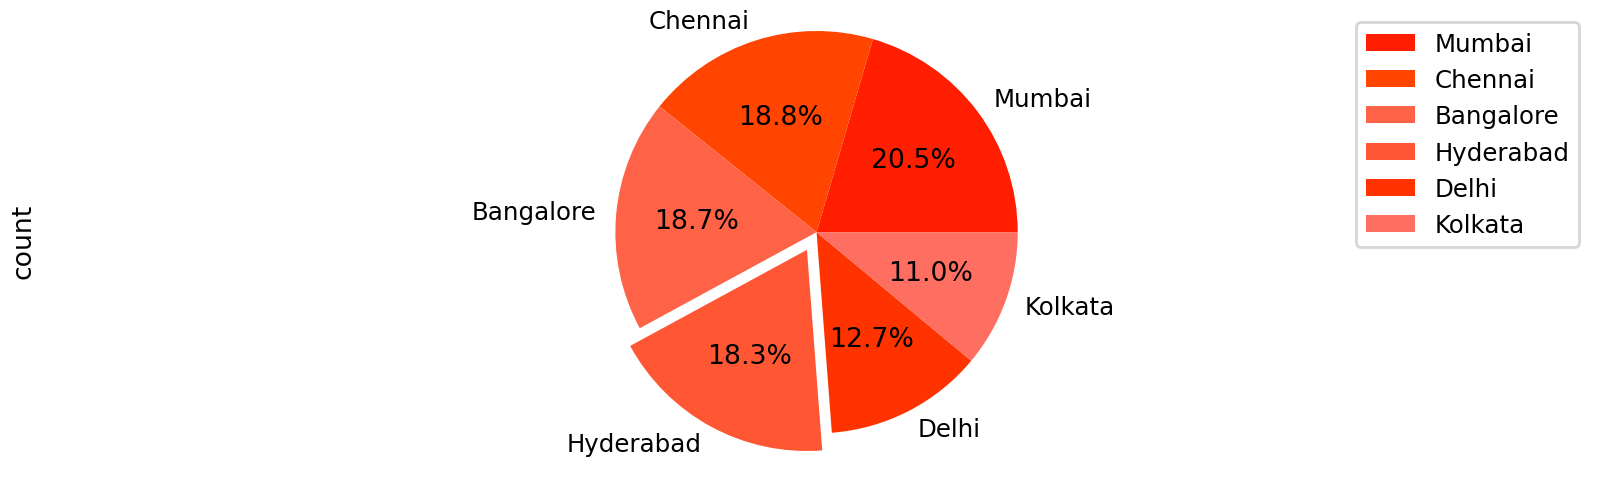

In [21]:
#pie chart->percentage wise calculation
#Data dic== To know the about the dataset
plt.figure(figsize=(20, 6))
counts=rent_df["City"].value_counts()
explode=(0,0,0,0.1,0,0)
colors=["#FF1E00","#FF4500","#FF6347","#FF5733","#FF3300","#FF6F61"]
counts.plot(kind="pie",colors=colors,explode=explode,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels=counts.index,loc='best')
plt.show()

ValueError: 'explode' must be of length 'x'

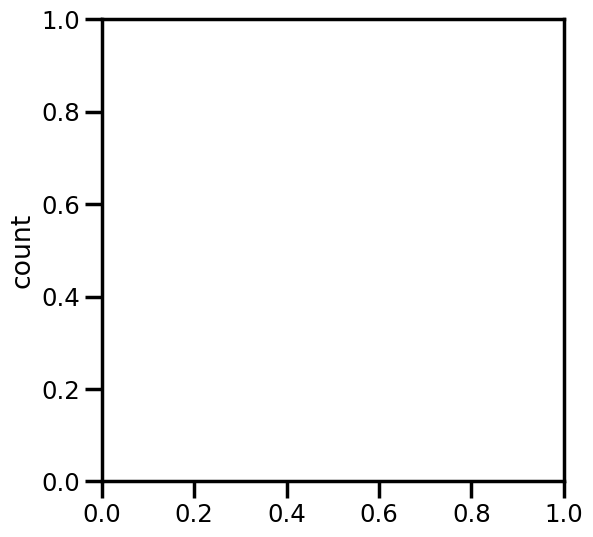

In [22]:
plt.figure(figsize=(20, 6))
counts=rent_df["Floor"].value_counts()
explode=(0,0,0,0.1,0,0)
colors=["#FF1E00","#FF4500","#FF6347","#FF5733","#FF3300","#FF6F61"]
counts.plot(kind="pie",colors=colors,explode=explode,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels=counts.index,loc='best')
plt.show()

In [ ]:
#Scatter plot --> Distribution of data
plt.figure(figsize=(20,8))
plt.ticklabel_format(style="plain")
plt.scatter(rent_df["Size"],rent_df["Rent"])
plt.xlabel("Size")
plt.ylabel("Rent")

In [ ]:
plt.figure(figsize=(20,8))
plt.ticklabel_format(style="plain")
plt.scatter(rent_df["Area_Type"],rent_df["Rent"])
plt.xlabel("Size")
plt.ylabel("Rent")

In [ ]:
#Histogram on House Size
#Histogram(bins)--> like barchart(patches) 
n_bins=20
plt.figure(figsize=(30,8))
rent_df["Size"].hist(bins=n_bins)

In [ ]:
n_bins=20
plt.figure(figsize=(20,5))
rent_df["Rent"].hist(bins=n_bins)

In [ ]:
n_bins=20
plt.figure(figsize=(20,5))
rent_df["BHK"].hist(bins=n_bins)

In [ ]:
#Heat Map-->Correlation in a dataset(important)
plt.figure(figsize=(15,5))
sns.heatmap(pd.crosstab(rent_df["Area Type"],rent_df["BHK"]));

In [ ]:
#Outliers
# Creating the subplots
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

# Plotting the boxplots
plt1 = sns.boxplot(data['Rent'], ax=axs[0, 0])
plt2 = sns.boxplot(data['Size'], ax=axs[0, 1])

# Adjusting the layout
plt.tight_layout()

# Displaying the plots
plt.show()
#most of the values near the higher whisker

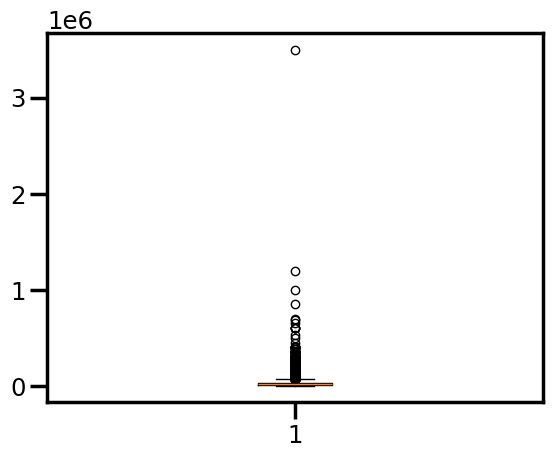

In [28]:
#Outlier treatment for price
# Rent>=Q1-1.5*IQR(for lower side if we give< the data points go outside the q1 and for q3 the wise versa)
plt.boxplot(data.Rent)
Q1=data.Rent.quantile(0.25)
Q3=data.Rent.quantile(0.75)
IQR=Q3-Q1
housing=data[(data.Rent>=Q1-1.5*IQR)&(data.Rent<=Q3+1.5*IQR)]


In [29]:
#the data stored in housing variable--- so we toook housing varialble for building the model
housing

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [ ]:
#Outlier treatment for size
plt.boxplot(data.Size)
Q1=data.Size.quantile(0.25)
Q3=data.Size.quantile(0.75)
IQR=Q3-Q1
housing=data[(data.Size>=Q1-1.5*IQR)&(data.Size<=Q3+1.5*IQR)]

In [ ]:
#Outlier treatment for BHK
plt.boxplot(data.BHK)
Q1=data.BHK.quantile(0.25)
Q3=data.BHK.quantile(0.75)
IQR=Q3-Q1
housing=data[(data.BHK>=Q1-1.5*IQR)&(data.BHK<=Q3+1.5*IQR)]

In [ ]:
#Feature Engineering or Feature Selection
#1-convert the data object into numericalvalues for model building
#2-label encode-> convert the data
#3-split thedataset into x and y
#3-split thedataset into x and y
#make sure having the sufficient data to building the model
X=data[:]
y=['Rent']


In [ ]:
pip install sklearn.ensemble

In [ ]:
pip install category_encoders

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [52]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable


In [53]:
import category_encoders as ce

In [54]:
housing_final=housing.drop(columns="Posted On")

In [55]:
#split into X and y
X=housing_final.drop(columns="Rent")
y=housing_final["Rent"]#target

In [56]:
X.info()#indepedent variable

<class 'pandas.core.frame.DataFrame'>
Index: 4226 entries, 0 to 4745
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4226 non-null   int64 
 1   Size               4226 non-null   int64 
 2   Floor              4226 non-null   object
 3   Area Type          4226 non-null   object
 4   Area Locality      4226 non-null   object
 5   City               4226 non-null   object
 6   Furnishing Status  4226 non-null   object
 7   Tenant Preferred   4226 non-null   object
 8   Bathroom           4226 non-null   int64 
 9   Point of Contact   4226 non-null   object
dtypes: int64(3), object(7)
memory usage: 363.2+ KB


In [57]:
y.info()#target variable

<class 'pandas.core.series.Series'>
Index: 4226 entries, 0 to 4745
Series name: Rent
Non-Null Count  Dtype
--------------  -----
4226 non-null   int64
dtypes: int64(1)
memory usage: 66.0 KB


In [58]:
#Linear regression --> go for category encoder
encoder = ce.LeaveOneOutEncoder()
x = encoder.fit_transform(X, y)

In [59]:
#string datatypes are converted into float
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4226 entries, 0 to 4745
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4226 non-null   int64  
 1   Size               4226 non-null   int64  
 2   Floor              4226 non-null   float64
 3   Area Type          4226 non-null   float64
 4   Area Locality      4226 non-null   float64
 5   City               4226 non-null   float64
 6   Furnishing Status  4226 non-null   float64
 7   Tenant Preferred   4226 non-null   float64
 8   Bathroom           4226 non-null   int64  
 9   Point of Contact   4226 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 363.2 KB


In [60]:
x

,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,1100,12633.295652,15524.822838,6500.000000,11325.806513,16341.877397,17800.472856,2,14849.614146
1,2,800,15002.500000,15520.624685,3500.000000,11306.649425,20392.558245,17797.260520,1,14846.456584
2,2,1000,15013.214286,15521.884131,23600.000000,11312.396552,20394.071104,17798.224221,1,14847.403852
3,2,800,12480.697051,15524.822838,22000.000000,11325.806513,16341.877397,17800.472856,1,14849.614146
4,2,850,12487.399464,24176.464674,19286.162565,11330.595785,16343.330041,22955.149725,1,14850.403536
...,...,...,...,...,...,...,...,...,...,...
4741,2,1000,18333.512500,24172.388587,16500.000000,17271.068720,20395.079677,17798.866688,2,14848.035365
4742,3,2000,17626.063830,15516.846348,19286.162565,17254.481043,20388.019667,17794.369419,3,14843.614777
4743,3,1750,18083.512500,24161.519022,30000.000000,17247.372038,20384.993949,17792.442017,3,32598.574811
4744,3,1500,19286.162565,24156.084239,41944.444444,17235.523697,20379.951084,24389.010471,2,32589.105114


In [61]:
#test split into 20% and 80%
#random -40%--> it will atleast 40% of data in the correct model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)

In [62]:
x_train


,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
2537,1,400,17969.599119,24172.388587,15214.285714,19267.695100,20395.079677,17798.866688,1,32617.514205
1771,1,500,14136.097561,15525.242653,7500.000000,16743.764706,20398.105396,17800.794089,1,14849.929902
1295,2,950,19286.162565,24145.214674,65000.000000,36676.513245,24750.499037,17782.805011,2,32570.165720
3214,2,1100,14737.500000,15519.365239,27142.857143,16344.117786,24831.423892,17796.296820,2,14845.509315
3110,3,1600,12621.701449,24172.932065,8500.000000,16354.718492,24848.764933,17799.187922,3,14848.351121
...,...,...,...,...,...,...,...,...,...,...
2518,2,1000,14747.368421,24169.671196,19286.162565,19258.620690,20392.558245,17797.260520,2,14846.456584
4109,3,1771,19479.611650,15522.094039,15000.000000,17269.291469,16338.100523,17798.384838,3,14847.561730
3834,2,800,11618.957672,24175.105978,10965.666667,16359.429918,20397.601109,22951.715659,2,14849.614146
3543,2,700,14099.512195,15522.094039,24000.000000,16351.773852,20394.323248,17798.384838,2,14847.561730


In [63]:
y_train

2537    15000
1771     9000
1295    65000
3214    23000
3110    14000
        ...  
2518    20000
4109    16500
3834    10000
3543    16500
3897    13000
Name: Rent, Length: 3380, dtype: int64

In [64]:
x_test

,BHK,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
677,1,570,29416.666667,15520.624685,19286.162565,36751.016556,24837.204239,17797.260520,2,14846.456584
968,2,742,38000.000000,24154.453804,39666.666667,36704.658940,16319.797211,24381.157068,2,32586.264205
594,1,320,54500.000000,15516.426532,20500.000000,36734.460265,24817.936416,24428.277487,1,14843.299021
3555,2,1000,11616.312169,15524.612930,11230.769231,16358.840989,16341.586868,17800.312239,2,14849.456268
894,1,430,19286.162565,24166.953804,21000.000000,36742.738411,16333.161534,24441.366492,2,32608.044508
...,...,...,...,...,...,...,...,...,...,...
2769,1,500,18365.517241,15526.292191,19286.162565,19283.121597,16343.911098,17801.597173,1,14850.719293
1499,2,1040,18432.352941,15521.884131,12083.333333,16734.352941,24842.984586,17798.224221,2,14847.403852
2352,1,400,15052.500000,15526.502099,9000.000000,16747.294118,16344.201627,17801.757790,1,14850.877171
303,2,700,12453.887399,15520.624685,23076.923077,11306.649425,24837.204239,17797.260520,1,14846.456584


In [65]:
y_test

677     20000
968     48000
594     30000
3555    10500
894     25000
        ...  
2769     6500
1499    17000
2352     6000
303     20000
1211    52000
Name: Rent, Length: 846, dtype: int64

In [66]:
#split 7 trees and give the output from those 7tress
random_forest=RandomForestRegressor(n_estimators=7)
decision_tree=DecisionTreeRegressor()
linear_regression=LinearRegression()

In [67]:
models=[random_forest,decision_tree,linear_regression]

In [4]:
for i in models:
    print(f"fitting_model:{i}")
    i.fit(x_train,y_train)

NameError: name 'models' is not defined

In [69]:
#find score for trained data
for i in models:
    print(f"score of {i} for training data:{i.score(x_train,y_train)}")

score of RandomForestRegressor(n_estimators=7) for training data:0.9998201241737655
score of DecisionTreeRegressor() for training data:1.0
score of LinearRegression() for training data:0.706327046516714


In [70]:
#find score for test data
for i in models:
    print(f"score of {i} for testing data:{i.score(x_test,y_test)}")

score of RandomForestRegressor(n_estimators=7) for testing data:0.9986316232250959
score of DecisionTreeRegressor() for testing data:0.9997316129402172
score of LinearRegression() for testing data:0.7298307874535555


In [71]:
for i in models[:]:
    y_predicted=i.predict(x_test)
    print(f"Report:{i}")

Report:RandomForestRegressor(n_estimators=7)
Report:DecisionTreeRegressor()
Report:LinearRegression()


In [72]:
#feature importance


In [73]:
#Other algorithms
#Ridge
#Lasso
#ElasticNet Search
#Multilinear

In [77]:
def regression_results(y_true,y_pred):
    mae=metrics.mean_absolute_error(y_true,x_pred)
    mse=metrics.mean_squared_error(y_true,y_pred)
    msle=metrics.mean_squared_log_error(y_true,y_pred)
    r2=metrics.r2_score(y_true,y_pred)
print('r2',round(r2,4))
print('mae',round(mae,4))
print('mse',round(mse,4))
print('rmse',round(np.sqrt(mse),4))

NameError: name 'r2' is not defined

In [76]:
#test--xtest,ytest-->30% of data...predict y by using x value
#train--70% of data stored in models
for model in models[:]:
    y_predicted=model.predict(x_test)
    print(f"Report:{i}")
    print(f"{regression_results(y_test,y_predicted)}\n")

Report:LinearRegression()


NameError: name 'metrics' is not defined

In [78]:
from sklearn import metrics
import numpy as np

def regression_results(y_true, y_pred):
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    msle = metrics.mean_squared_log_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    
    print('r2:', round(r2, 4))
    print('mae:', round(mae, 4))
    print('mse:', round(mse, 4))
    print('rmse:', round(np.sqrt(mse), 4))

In [80]:
from sklearn import metrics
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def regression_results(y_true, y_pred):
    mae = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    
    return {
        'r2': round(r2, 4),
        'mae': round(mae, 4),
        'mse': round(mse, 4),
        'rmse': round(np.sqrt(mse), 4)
    }
for i, model in enumerate(models):
    model.fit(x_train, y_train)  # Fit the model with training data
    y_predicted = model.predict(x_test)  # Predict using test data
    print(f"Report for model {i}: {model}")
    results = regression_results(y_test, y_predicted)
    print(f"Results: {results}\n")


Report for model 0: RandomForestRegressor(n_estimators=7)
Results: {'r2': 0.9995, 'mae': 49.4298, 'mse': 91417.3962, 'rmse': 302.3531}

Report for model 1: DecisionTreeRegressor()
Results: {'r2': 0.9998, 'mae': 31.1099, 'mse': 37049.2376, 'rmse': 192.4818}

Report for model 2: LinearRegression()
Results: {'r2': 0.7298, 'mae': 5229.2313, 'mse': 53845428.8295, 'rmse': 7337.9445}



In [ ]:
#in classification model--> logistics regression
#f1 score 
#0-0.5-->0
#0.5-1-->1
